# Neural Networks

## Building the model

In this section we will cover the following topics:

- Building a simple classifier.
- Training a model, and the training loop.
- Saving the model.
- Evaluation metrics.

In [107]:
import timeit
import torch
import torch.nn as nn
import numpy as np
import torchvision
from torchvision import transforms
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
np.random.seed(42)  # for reproducibility
torch.manual_seed(42)

In [108]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_set = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=16,
    shuffle=True,
    num_workers=2
)


test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=24,
    shuffle=False,
    num_workers=2
)

classes = np.arange(0, 10)

- To build a simple Neural Network, there are two steps:

  1. Define the network.
  2. Specify a loss function and optimizer.

- First, we recommend defining the network as a class. The **nn** or Neural Network part of PyTorch contains all the classes and functions related to defining a neural network.

- Let's build a simple linear classifier.

- All networks should inherit from the **nn.Module** parent class: https://pytorch.org/docs/stable/nn.html#module

- **nn.Module** stores learnable weights and state.

- You will always need two functions:

  1. __init__, which will be called the moment you instantiate the class.
  2. **forward()** function which will be called during training.

- The documentation for all the nn.Module layers supported by PyTorch is [here](https://pytorch.org/docs/stable/nn.html)

In [89]:
class LinearClassifier(nn.Module):

    def __init__(self, num_classes=10):
        # Calls __init__() on the parent class, which is nn.Module
        super(LinearClassifier, self).__init__()

        # Define each layer of the network as a class variable
        # fc1 stands for first fully-connected layer
        self.fc1 = nn.Linear(28 * 28, num_classes)

    def forward(self, x):
        out = x.reshape(x.size(0), -1)
        out = self.fc1(out)
        return out

- We can now create a classifier instance.

In [90]:
model = LinearClassifier()
model

LinearClassifier(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)

The layers can be accessed directly and so can their parameters!

In [91]:
model.fc1

Linear(in_features=784, out_features=10, bias=True)

In [92]:
model.fc1.weight

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       requires_grad=True)

Now define the loss and optimiser.


- Optimisers https://pytorch.org/docs/stable/optim.html
- Loss functions https://pytorch.org/docs/stable/nn.html#loss-functions

In [93]:
criterion = nn.CrossEntropyLoss()

# Stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Our optimizer acts to minimize our choice of loss function. The loss function quantifies how well the model is doing, and is often called the error function (in statistics) or the cost function (in economics).

![SGD](sgd.gif)

## Training

During training, we iterate over a fixed number of epochs. An epoch is *one complete iteration through the entire training set.*

You can either fix the number of epochs to train for, or can dynamically determine when to stop training. Alternately, you can checkpoint frequently over a large fixed number of epochs and then determine the best model later.

In [95]:
def train_model_epochs(num_epochs):
    """ Trains the model for a given number of epochs on the training set. """
    for epoch in range(num_epochs):

        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            images, labels = data

            # Zero the parameter gradients means to reset them from
            # any previous values. By default, gradients accumulate!
            optimizer.zero_grad()

            # Passing inputs to the model calls the forward() function of
            # the Module class, and the outputs value contains the return value
            # of forward()
            outputs = model(images)

            # Compute the loss based on the true labels
            loss = criterion(outputs, labels)

            # Backpropagate the error with respect to the loss
            loss.backward()

            # Updates the parameters based on current gradients and update rule;
            # in this case, defined by SGD()
            optimizer.step()

            # Print our loss
            running_loss += loss.item()
            if i % 1000 == 999:    # print every 1000 mini-batches
                print('Epoch / Batch [%d / %d] - Loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 1000))
                running_loss = 0.0

Now to train it

In [96]:
# train_model_epochs(num_epochs)

cpu_train_time = timeit.timeit(
    "train_model_epochs(num_epochs)",
    setup="num_epochs=6",
    number=1,
    globals=globals(),
)

Epoch / Batch [1 / 1000] - Loss: 0.617
Epoch / Batch [1 / 2000] - Loss: 0.385
Epoch / Batch [1 / 3000] - Loss: 0.374
Epoch / Batch [2 / 1000] - Loss: 0.335
Epoch / Batch [2 / 2000] - Loss: 0.320
Epoch / Batch [2 / 3000] - Loss: 0.324
Epoch / Batch [3 / 1000] - Loss: 0.311
Epoch / Batch [3 / 2000] - Loss: 0.308
Epoch / Batch [3 / 3000] - Loss: 0.300
Epoch / Batch [4 / 1000] - Loss: 0.302
Epoch / Batch [4 / 2000] - Loss: 0.309
Epoch / Batch [4 / 3000] - Loss: 0.288
Epoch / Batch [5 / 1000] - Loss: 0.291
Epoch / Batch [5 / 2000] - Loss: 0.297
Epoch / Batch [5 / 3000] - Loss: 0.288
Epoch / Batch [6 / 1000] - Loss: 0.285
Epoch / Batch [6 / 2000] - Loss: 0.296
Epoch / Batch [6 / 3000] - Loss: 0.283


In [97]:
cpu_train_time

120.2567672289997

How does the classifier perform on the test set?

In [98]:
correct = 0
total = 0

with torch.no_grad():
    # Iterate over the test set
    for data in test_loader:
        images, labels = data

        outputs = model(images)

        # torch.max is an argmax operation
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print("correct: %d" % correct)
print("total: %d" % total)
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

correct: 9165
total: 10000
Accuracy of the network on the test images: 91 %


In [99]:
labels

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [100]:
predicted

tensor([1, 2, 8, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

You can save and reload models. Torch models are checkpoint files.

https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [101]:
torch.save(model, './my_mnist_model.pt')

Accuracy and confusion matrix.

In [103]:
cm = confusion_matrix(labels, predicted)

In [104]:
cm

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

Let's make it easy on the eyes.

In [105]:
import itertools

def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix very prettily.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    # Specify the tick marks and axis text
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    # The data formatting
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Print the text of the matrix, adjusting text colour for display
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

Confusion matrix, without normalization


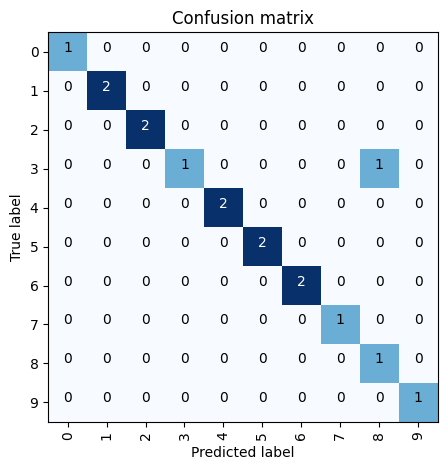

In [106]:
plot_confusion_matrix(cm, classes)

Exercise: You have been provided with the new data for a dataset called [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist)

Try to train a model on it!

Note: The classes have names this time

In [ ]:
# Data loading

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_set = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=16,
    shuffle=True,
    num_workers=2
)


test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=24,
    shuffle=False,
    num_workers=2
)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

In [112]:
# Define your model w Init and Forward function

In [109]:
# Define your loss function and optimizer

In [110]:
# Perform the training loop

In [111]:
correct = 0
total = 0

with torch.no_grad():
    # Iterate over the test set
    for data in test_loader:
        images, labels = data

        outputs = model(images)

        # torch.max is an argmax operation
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print("correct: %d" % correct)
print("total: %d" % total)
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

cm = confusion_matrix(labels, predicted)
plot_confusion_matrix(cm, classes)

Solution:

In [ ]:
model = LinearClassifier()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

train_model_epochs(4)

Challenge Exercise: Try classification on [EMNIST](https://docs.pytorch.org/vision/stable/generated/torchvision.datasets.EMNIST.html#torchvision.datasets.EMNIST)

In [ ]:
# Data loading

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = torchvision.datasets.EMNIST(
    root='./data',
    split='byclass',
    train=True,
    download=True,
    transform=transform
)

test_set = torchvision.datasets.EMNIST(
    root='./data',
    split='byclass',
    train=False,
    download=True,
    transform=transform
)

train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=64,
    shuffle=True,
    num_workers=2
)


test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=128,
    shuffle=False,
    num_workers=2
)